In [238]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [239]:
# loading dataset
telco_cust = pd.read_csv('Telco-Customer-Churn.csv')

In [240]:
telco_cust.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [241]:
# checking for null values
telco_cust.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [242]:
# checking data types of all columns
telco_cust.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [243]:
# converting total charge column to numeric
telco_cust.TotalCharges = telco_cust.TotalCharges.apply(pd.to_numeric, errors='coerce')

In [244]:
telco_cust['TotalCharges'].isnull().sum()

11

##### total charges column has null values for 11 rows where tenure is 0. We can either remove those rows from analysis or we can simply impute monthly charge values into total charges as they gone pay that at end of first month. I selected later aproach.

In [245]:
# replacing empty total charge column with monthly charge value
for i in range(telco_cust.shape[0]):
    if telco_cust.loc[i,'tenure'] == 0:
        telco_cust.loc[i,'TotalCharges'] = telco_cust.loc[i,'MonthlyCharges']

In [246]:
telco_cust['TotalCharges'].isnull().sum()

0

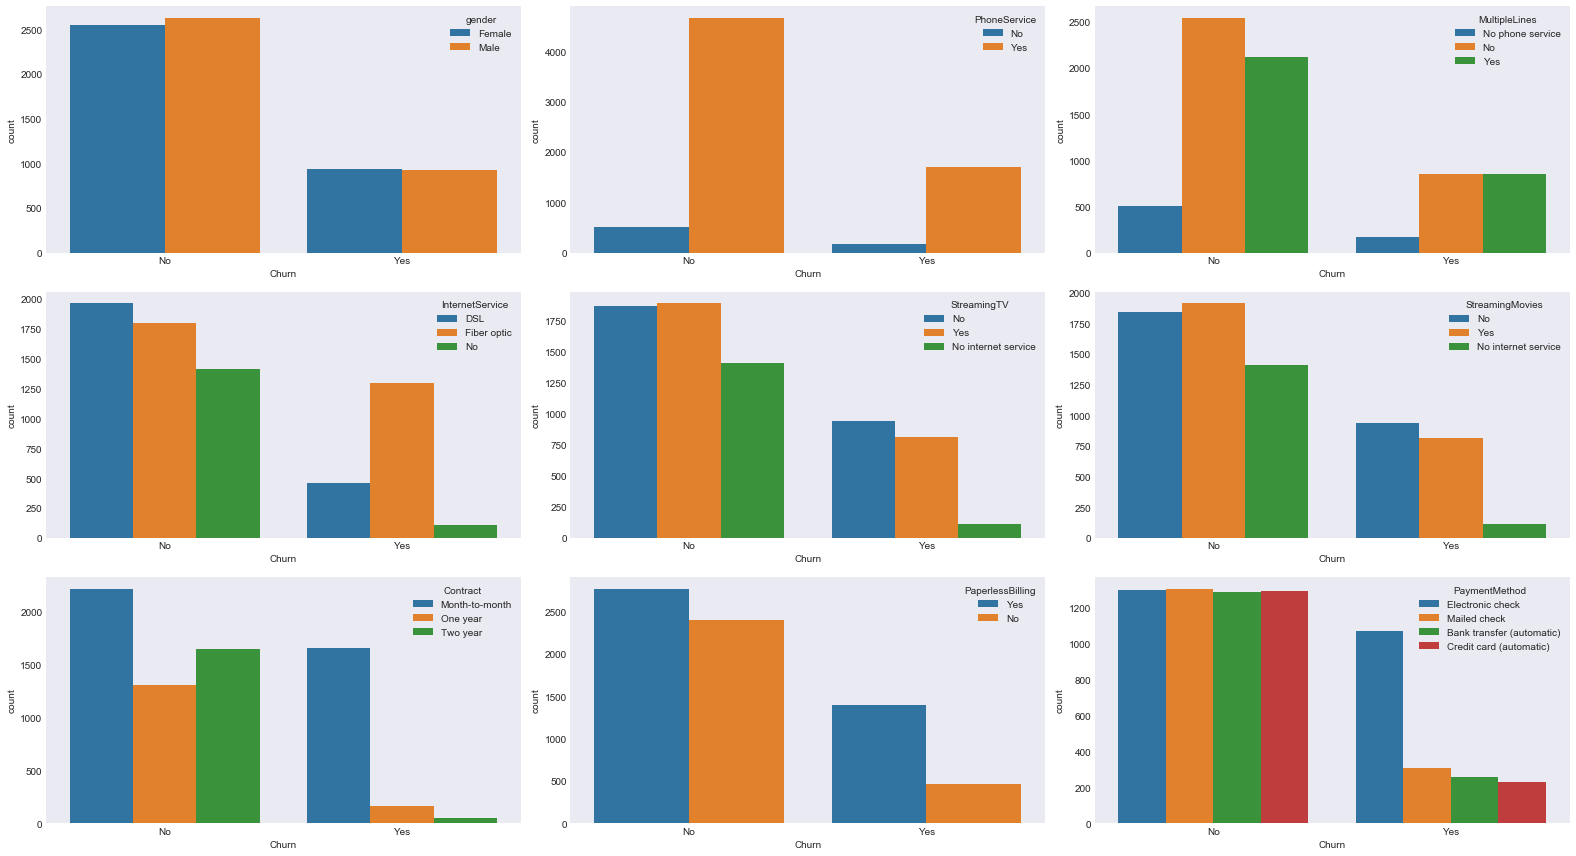

In [247]:
# visualizing churn across different variables
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(22,12))
(ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9) = ax.flatten()
sns.set_style("dark")
sns.countplot(x='Churn', hue='gender', data=telco_cust, ax=ax1)
sns.countplot(x='Churn', hue='PhoneService', data=telco_cust, ax=ax2)
sns.countplot(x='Churn', hue='MultipleLines', data=telco_cust, ax=ax3)
sns.countplot(x='Churn', hue='InternetService', data=telco_cust, ax=ax4)
sns.countplot(x='Churn', hue='StreamingTV', data=telco_cust, ax=ax5)
sns.countplot(x='Churn', hue='StreamingMovies', data=telco_cust, ax=ax6)
sns.countplot(x='Churn', hue='Contract', data=telco_cust, ax=ax7)
sns.countplot(x='Churn', hue='PaperlessBilling', data=telco_cust, ax=ax8)
sns.countplot(x='Churn', hue='PaymentMethod', data=telco_cust, ax=ax9)
fig.tight_layout()

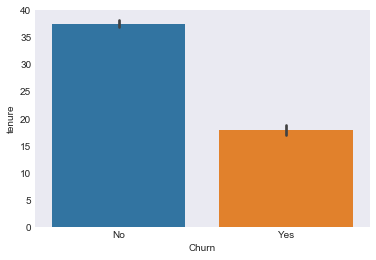

In [248]:
# plotting tenure for churn
sns.barplot(x='Churn', y='tenure', data=telco_cust)

##### people with short tenure tend to churn more

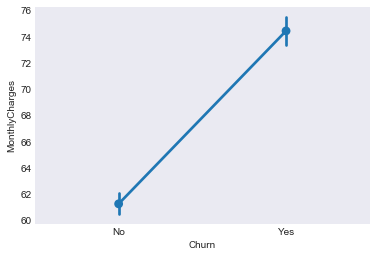

In [249]:
sns.pointplot(x='Churn', y='MonthlyCharges', data=telco_cust)

##### people with high monthly charges tend to churn more

In [250]:
# creating bins for tenure and mothly charge columns
telco_cust['binned_tenure'] = pd.cut(telco_cust['tenure'], bins=[0, 15, 30, 45, 60, 75], labels=[15, 30, 45, 60, 75])
telco_cust['binned_month_charges'] = pd.cut(telco_cust['MonthlyCharges'], bins=[0, 25, 50, 75, 100, 125],
                                           labels=[25, 50, 75, 100, 125])

In [251]:
telco_cust.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,binned_tenure,binned_month_charges
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,15,50
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.50,No,45,75
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,15,75
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,45,50
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,15,75


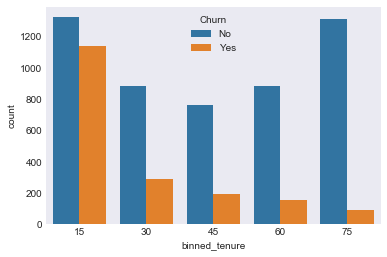

In [252]:
sns.countplot(x='binned_tenure', hue='Churn', data=telco_cust)

##### as expected as tenure increases, churn rate decreases

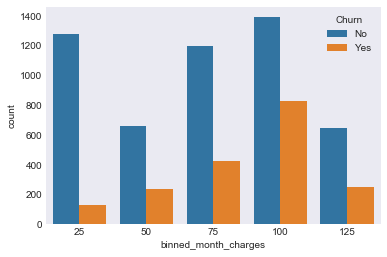

In [253]:
sns.countplot(x='binned_month_charges', hue='Churn', data=telco_cust)

#### churn rate is high for people with high monthly charges except for highest bins

In [254]:
# subsetting data for highest monthly charge bin
cust_100_125 = telco_cust[telco_cust['binned_month_charges'] == 125]

<bound method Figure.tight_layout of <matplotlib.figure.Figure object at 0x000002148ABEFB38>>

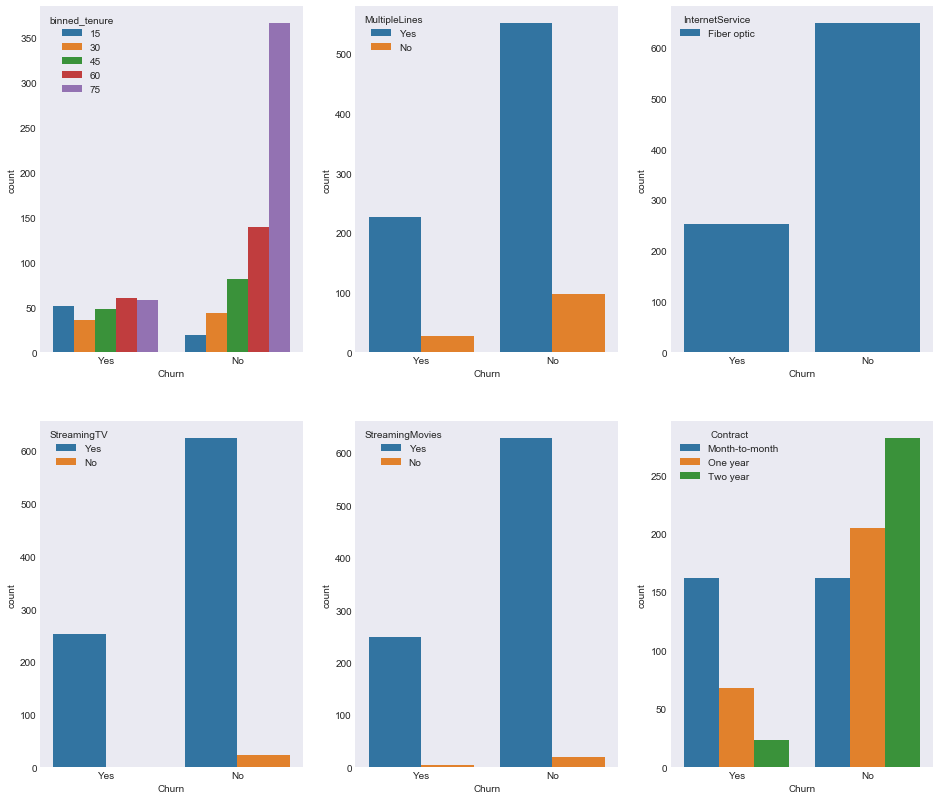

In [255]:
# plotting churn against all variables for highest monthly charge bin
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(16,14))
(ax1,ax2,ax3,ax4,ax5,ax6) = ax.flatten()
sns.set_style("dark")
sns.countplot(x='Churn', hue='binned_tenure', data=cust_100_125, ax=ax1)
sns.countplot(x='Churn', hue='MultipleLines', data=cust_100_125, ax=ax2)
sns.countplot(x='Churn', hue='InternetService', data=cust_100_125, ax=ax3)
sns.countplot(x='Churn', hue='StreamingTV', data=cust_100_125, ax=ax4)
sns.countplot(x='Churn', hue='StreamingMovies', data=cust_100_125, ax=ax5)
sns.countplot(x='Churn', hue='Contract', data=cust_100_125, ax=ax6)
fig.tight_layout

##### people who has highest monthly charges, uses all the service like telephone, intenet, tv streaming and hence there monthly charges are high. But since they are satisfied with services the churn rate is low

In [256]:
# changing index to customer id
telco_cust.index = telco_cust['customerID']
telco_cust = telco_cust.drop('customerID', axis='columns')

In [257]:
col = ['MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV',
       'StreamingMovies']

#### few columns contains value such as 'no internet service' or 'no phone service' which is same as 'No'. hence converting them to 'No'

In [258]:
def find_no(col):
    c = []
    for i in range(col.shape[0]):
        if col[i].find('No') == 0:
            c.append(col[i][0:2])
        else:
            c.append(col[i])
    return c

In [259]:
MultipleLines = find_no(telco_cust['MultipleLines'])
OnlineSecurity = find_no(telco_cust['OnlineSecurity'])
OnlineBackup = find_no(telco_cust['OnlineBackup'])
DeviceProtection = find_no(telco_cust['DeviceProtection'])
TechSupport = find_no(telco_cust['TechSupport'])
StreamingTV = find_no(telco_cust['StreamingTV'])
StreamingMovies = find_no(telco_cust['StreamingMovies'])

In [260]:
telco_cust = telco_cust.drop(['MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV',
                              'StreamingMovies'], axis=1)

In [261]:
telco_cust['MultipleLines'] = MultipleLines
telco_cust['OnlineSecurity'] = OnlineSecurity
telco_cust['OnlineBackup'] = OnlineBackup
telco_cust['DeviceProtection'] = DeviceProtection
telco_cust['TechSupport'] = TechSupport
telco_cust['StreamingTV'] = StreamingTV
telco_cust['StreamingMovies'] = StreamingMovies

In [262]:
telco_cust.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,Contract,PaperlessBilling,PaymentMethod,...,Churn,binned_tenure,binned_month_charges,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,DSL,Month-to-month,Yes,Electronic check,...,No,15,50,No,No,Yes,No,No,No,No
5575-GNVDE,Male,0,No,No,34,Yes,DSL,One year,No,Mailed check,...,No,45,75,No,Yes,No,Yes,No,No,No
3668-QPYBK,Male,0,No,No,2,Yes,DSL,Month-to-month,Yes,Mailed check,...,Yes,15,75,No,Yes,Yes,No,No,No,No
7795-CFOCW,Male,0,No,No,45,No,DSL,One year,No,Bank transfer (automatic),...,No,45,50,No,Yes,No,Yes,Yes,No,No
9237-HQITU,Female,0,No,No,2,Yes,Fiber optic,Month-to-month,Yes,Electronic check,...,Yes,15,75,No,No,No,No,No,No,No


In [263]:
# creating dummy variables
gender = pd.get_dummies(telco_cust['gender'],drop_first=True)
Partner = pd.get_dummies(telco_cust['Partner'],drop_first=True, prefix='Partner', prefix_sep='_')
Dependents = pd.get_dummies(telco_cust['Dependents'],drop_first=True, prefix='Dependents', prefix_sep='_')
PhoneService = pd.get_dummies(telco_cust['PhoneService'],drop_first=True, prefix='PhoneService', prefix_sep='_')
MultipleLines = pd.get_dummies(telco_cust['MultipleLines'],drop_first=True, prefix='MultipleLines', prefix_sep='_')
InternetService = pd.get_dummies(telco_cust['InternetService'],drop_first=True, prefix='InternetService', prefix_sep='_')
OnlineSecurity = pd.get_dummies(telco_cust['OnlineSecurity'],drop_first=True, prefix='OnlineSecurity', prefix_sep='_')
OnlineBackup = pd.get_dummies(telco_cust['OnlineBackup'],drop_first=True, prefix='OnlineBackup', prefix_sep='_')
DeviceProtection = pd.get_dummies(telco_cust['DeviceProtection'],drop_first=True, prefix='DeviceProtection', prefix_sep='_')
StreamingTV = pd.get_dummies(telco_cust['StreamingTV'],drop_first=True, prefix='StreamingTV', prefix_sep='_')
StreamingMovies = pd.get_dummies(telco_cust['StreamingMovies'],drop_first=True, prefix='StreamingMovies', prefix_sep='_')
Contract = pd.get_dummies(telco_cust['Contract'],drop_first=True)
PaperlessBilling = pd.get_dummies(telco_cust['PaperlessBilling'],drop_first=True, prefix='PaperlessBilling', prefix_sep='_')
PaymentMethod = pd.get_dummies(telco_cust['PaymentMethod'],drop_first=True)
Churn = pd.get_dummies(telco_cust['Churn'],drop_first=True, prefix='Churn', prefix_sep='_')

In [264]:
columns = ['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity',
           'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract',
           'PaperlessBilling','PaymentMethod','Churn']

In [265]:
telco_cust.drop(columns, axis=1,inplace=True)

In [266]:
telco_cust = pd.concat([telco_cust,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,
                       OnlineSecurity,OnlineBackup,DeviceProtection,StreamingTV,StreamingMovies,
                       Contract,PaperlessBilling,PaymentMethod,Churn],axis=1)

In [267]:
telco_cust.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,binned_tenure,binned_month_charges,Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,...,DeviceProtection_Yes,StreamingTV_Yes,StreamingMovies_Yes,One year,Two year,PaperlessBilling_Yes,Credit card (automatic),Electronic check,Mailed check,Churn_Yes
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,0,1,29.85,29.85,15,50,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
5575-GNVDE,0,34,56.95,1889.50,45,75,1,0,0,1,...,1,0,0,1,0,0,0,0,1,0
3668-QPYBK,0,2,53.85,108.15,15,75,1,0,0,1,...,0,0,0,0,0,1,0,0,1,1
7795-CFOCW,0,45,42.30,1840.75,45,50,1,0,0,0,...,1,0,0,1,0,0,0,0,0,0
9237-HQITU,0,2,70.70,151.65,15,75,0,0,0,1,...,0,0,0,0,0,1,0,1,0,1


In [268]:
# importing all libraries required for logistic regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [269]:
telco_cust.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'binned_tenure', 'binned_month_charges', 'Male', 'Partner_Yes',
       'Dependents_Yes', 'PhoneService_Yes', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_Yes', 'OnlineBackup_Yes', 'DeviceProtection_Yes',
       'StreamingTV_Yes', 'StreamingMovies_Yes', 'One year', 'Two year',
       'PaperlessBilling_Yes', 'Credit card (automatic)', 'Electronic check',
       'Mailed check', 'Churn_Yes'],
      dtype='object')

In [270]:
x = telco_cust[['tenure','MonthlyCharges','TotalCharges','Male','Dependents_Yes','PhoneService_Yes','MultipleLines_Yes',
              'InternetService_Fiber optic','InternetService_No','OnlineSecurity_Yes','OnlineBackup_Yes',
              'DeviceProtection_Yes','StreamingTV_Yes','StreamingMovies_Yes','One year','Two year',
              'PaperlessBilling_Yes','Credit card (automatic)','Electronic check','Mailed check']]
y = telco_cust['Churn_Yes']

In [271]:
# splitting data into training and test dataset
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25,random_state=101)

In [272]:
# creating logistic model instatnce
lgmod = LogisticRegression()
lgmod.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [273]:
# prediction on test values
pred = lgmod.predict(x_test)

In [274]:
# creating confusion matrix
confusion_matrix = classification_report(y_test,pred)
print(confusion_matrix)

             precision    recall  f1-score   support

          0       0.83      0.91      0.87      1279
          1       0.68      0.52      0.59       482

avg / total       0.79      0.80      0.79      1761



##### Overall acuracy for above model is 79%. Which means we able to predict 79% of test data set churn values correctly based on the logistic model we developed